<a href="https://colab.research.google.com/github/hanahh080601/Colab/blob/main/SVM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Tập dữ liệu hiện được lưu trữ trong Khung dữ liệu Pandas

In [ ]:
data = pd.read_csv('Iris.csv')
print(len(data))

150


In [ ]:
dataset_x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy().reshape(150,4)

def species_to_num(name):
    if name == 'Iris-setosa':
        return 0
    else:
        return 1
dataset_y = data.apply(lambda x: species_to_num(x['Species']),axis=1).to_numpy().reshape(150,1)
dataset_xy = np.hstack((dataset_x,dataset_y))
np.random.shuffle(dataset_xy)

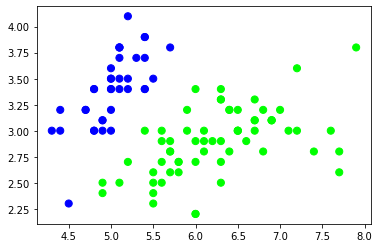

In [ ]:
data_x = dataset_xy[:100, :2]
data_y = dataset_xy[:100, 4]
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=50, cmap='brg');

In [ ]:
parameter_candidates = [
  {'C': [0.1, 1, 5, 10, 100, 1000], 'kernel': ['linear']},
]

clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(data_x, data_y)
print('Best score:', clf.best_score_)
print('Best C:',clf.best_estimator_.C)

Best score: 1.0
Best C: 100


In [ ]:
clf = SVC(kernel='linear', C=100)
result = clf.fit(data_x, data_y)
print(clf.support_vectors_)

[[5.5 3.5]
 [4.5 2.3]
 [4.9 2.5]]


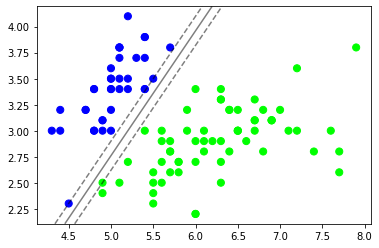

In [ ]:
def plot_svc_decision_function(clf, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = clf.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(clf.support_vectors_[:, 0],
                   clf.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=50, cmap='brg');
plot_svc_decision_function(clf)
plt.show()